In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn

import patsy
from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import sklearn.metrics as metrics

import random

In [2]:
suffix='RFsampleadult'
analysis_df_RFsampleadult = pd.read_csv('result_data/analysis_df_info'+suffix+'.csv')

In [3]:
analysis_df_RFsampleadult

,Unnamed: 0,ml_model,search_procedure,data,n_trials_for_selection,m_samples_per_n_trial,avg_disparity_change,UB_disparity_change,LB_disparity_change,avg_utility_change,...,LB_utility_change,avg_disparity_rank,UB_disparity_rank,LB_disparity_rank,avg_disparity_perfectguessrate,UB_disparity_perfectguessrate,LB_disparity_perfectguessrate,avg_utility_rank,UB_utility_rank,LB_utility_rank
0,0,RF,sample,adult,2,2000,-0.001594,0.003142,-0.006532,0.002612,...,-0.002861,1.25750,2.000,1.0,0.7425,0.7615,0.724000,1.80325,2.0,1.000
1,1,RF,sample,adult,3,2000,-0.002580,0.003252,-0.008799,0.003732,...,-0.002551,1.45400,3.000,1.0,0.6520,0.6740,0.630500,2.64400,3.0,1.000
2,2,RF,sample,adult,4,2000,-0.003196,0.002673,-0.009675,0.004539,...,-0.002444,1.61750,4.000,1.0,0.5985,0.6200,0.577000,3.51650,4.0,1.000
3,3,RF,sample,adult,5,2000,-0.003703,0.002230,-0.010608,0.005218,...,-0.001836,1.72150,4.000,1.0,0.5875,0.6085,0.565987,4.39850,5.0,2.000
4,4,RF,sample,adult,6,2000,-0.004064,0.001829,-0.010724,0.005454,...,-0.001243,1.85600,5.000,1.0,0.5490,0.5705,0.527500,5.26950,6.0,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,RF,sample,adult,96,2000,-0.009502,-0.001640,-0.017599,0.011684,...,0.003831,5.65025,34.000,1.0,0.3750,0.3965,0.354000,91.68125,96.0,73.000
95,95,RF,sample,adult,97,2000,-0.009503,-0.001879,-0.017531,0.011989,...,0.003745,5.61450,34.000,1.0,0.3655,0.3870,0.343988,93.04200,97.0,73.975
96,96,RF,sample,adult,98,2000,-0.009471,-0.002274,-0.017871,0.011917,...,0.003634,5.59575,28.025,1.0,0.3645,0.3860,0.343500,93.71975,98.0,73.000
97,97,RF,sample,adult,99,2000,-0.009593,-0.002946,-0.017539,0.011910,...,0.003973,5.17925,24.025,1.0,0.3780,0.3990,0.356500,94.82900,99.0,76.000


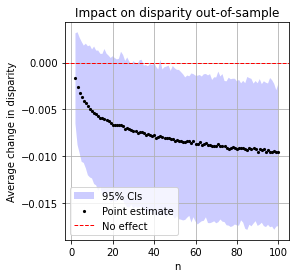

In [4]:
a =  list(analysis_df_RFsampleadult['n_trials_for_selection'])
b =  list(analysis_df_RFsampleadult['n_trials_for_selection'])
b.reverse()
CI_poly_xs = a+b

a =  list(analysis_df_RFsampleadult['LB_disparity_change'])
b =  list(analysis_df_RFsampleadult['UB_disparity_change'])
b.reverse()
CI_poly_ys = a+b

fig,ax = plt.subplots(figsize=[4,4])

plt.grid()
ax.fill(CI_poly_xs,CI_poly_ys,alpha=0.2,linewidth=0,label='95% CIs',color='blue')
#sns.scatterplot([0],[0],color='black')
sns.scatterplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='avg_disparity_change',color='black',linewidth=0,s=10,marker='o',label='Point estimate',zorder=10)
#sns.lineplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='avg_disparity_change',color='black',linewidth=2,label='Point estimate')
#sns.lineplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='LB_disparity_change',color='blue',linewidth=2,label='Point estimate')
plt.axhline(label='No effect',color='red',ls='--',linewidth=1,)

plt.xlabel("n")
plt.ylabel("Average change in disparity")
plt.title("Impact on disparity out-of-sample")

plt.legend()

plt.savefig('figures/oos_disparity'+suffix+'clean.png',bbox_inches='tight',dpi=300)


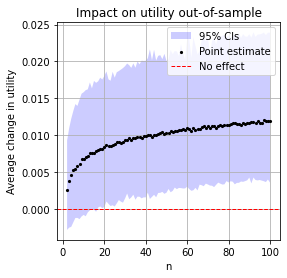

In [5]:
a =  list(analysis_df_RFsampleadult['n_trials_for_selection'])
b =  list(analysis_df_RFsampleadult['n_trials_for_selection'])
b.reverse()
CI_poly_xs = a+b

a =  list(analysis_df_RFsampleadult['LB_utility_change'])
b =  list(analysis_df_RFsampleadult['UB_utility_change'])
b.reverse()
CI_poly_ys = a+b

fig,ax = plt.subplots(figsize=[4,4])

plt.grid()
ax.fill(CI_poly_xs,CI_poly_ys,alpha=0.2,linewidth=0,label='95% CIs',color='blue')
#sns.scatterplot([0],[0],color='black')
sns.scatterplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='avg_utility_change',color='black',linewidth=0,s=10,marker='o',label='Point estimate',zorder=10)
#sns.lineplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='avg_utility_change',color='black',linewidth=2,label='Point estimate')
#sns.lineplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='LB_utility_change',color='blue',linewidth=2,label='Point estimate')
plt.axhline(label='No effect',color='red',ls='--',linewidth=1,)

plt.xlabel("n")
plt.ylabel("Average change in utility")
plt.title("Impact on utility out-of-sample")
plt.legend()

plt.savefig('figures/oos_utility'+suffix+'clean.png',bbox_inches='tight',dpi=300)


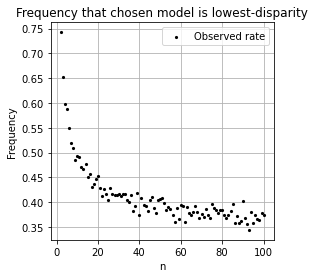

In [6]:
a =  [1] + list(analysis_df_RFsampleadult['n_trials_for_selection'])
b =  [1] + list(analysis_df_RFsampleadult['n_trials_for_selection'])
b.reverse()
CI_poly_xs = a+b

a =  [1] + list(analysis_df_RFsampleadult['LB_disparity_perfectguessrate'])
b =  [1] + list(analysis_df_RFsampleadult['UB_disparity_perfectguessrate'])
b.reverse()
CI_poly_ys = a+b

fig,ax = plt.subplots(figsize=[4,4])

plt.grid()
#ax.fill(CI_poly_xs,CI_poly_ys,alpha=0.15,label='95% CIs',color='blue')
#sns.scatterplot([0],[1],color='black')
sns.scatterplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='avg_disparity_perfectguessrate',color='black',linewidth=0,s=10,marker='o',label='Observed rate',zorder=10)
#sns.lineplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='avg_disparity_perfectguessrate',color='black',linewidth=2,label='Point estimate')
#sns.lineplot(data=analysis_df_RFsampleadult,x='n_trials_for_selection',y='LB_disparity_change',color='blue',linewidth=2,label='Point estimate')
#plt.axhline(1,label='No effect',color='red',linewidth=2,)

#plt.ylim([0,1])

plt.xlabel("n")
plt.ylabel("Frequency")

plt.title('Frequency that chosen model is lowest-disparity')
plt.legend()

plt.savefig('figures/oos_disparity_perfectguess_'+suffix+'_clean.png',bbox_inches='tight',dpi=300)


In [10]:
models=['LR','RF','DT']
searches=['randomseed','sample']
datasets = ['adult', 'germancreditlessfeatures']

suffixes = []
            

In [11]:
interpretation_df = pd.DataFrame({'model':[-1]*10,'search':[-1]*10,'dataset':[-1]*10,'avg_disparity_change':[-1]*10,'disp_stat_sig':[-1]*10,'avg_utility_change':[-1]*10,'util_stat_sig':[-1]*10,'avg_disparity_perfectguessrate':[-1]*10})
#interpretation_df.loc[:,'avg_disparity_change']=[-1]*10
#print(interpretation_df)
index = 0

for m in models:
    for s in searches:
        for d in datasets:
            if m=='LR' and s=='randomseed':
                continue
            suffixes = suffixes + [m+s+d]
            interpretation_df.loc[index,'model']=m
            interpretation_df.loc[index,'search']=s
            interpretation_df.loc[index,'dataset']=d
            index = index + 1
            
for i in range(len(suffixes)):
    print(i)
    data = pd.read_csv('result_data/analysis_df_info'+suffixes[i]+'.csv')
    #print(interpretation_df.loc[i,'disp_stat_sig'])
    #print(int(data.loc[data['n_trials_for_selection']==100,'UB_disparity_change']*data.loc[data['n_trials_for_selection']==100,'LB_disparity_change']>0))
    interpretation_df.loc[i,'disp_stat_sig'] = int(data.loc[data['n_trials_for_selection']==100,'UB_disparity_change']*data.loc[data['n_trials_for_selection']==100,'LB_disparity_change']>0)
    #print("disp_stat_sig: ",disp_stat_sig)
    interpretation_df.loc[i,'avg_disparity_change'] = float(data.loc[data['n_trials_for_selection']==100,'avg_disparity_change'])
    #print('disp_change: ',disp_change)
    interpretation_df.loc[i,'util_stat_sig'] = int(data.loc[data['n_trials_for_selection']==100,'UB_utility_change']*data.loc[data['n_trials_for_selection']==100,'LB_utility_change']>0)
    #print("util_stat_sig: ",util_stat_sig)
    interpretation_df.loc[i,'avg_utility_change'] = float(data.loc[data['n_trials_for_selection']==100,'avg_utility_change'])
    #print('util_change: ',util_change)
    interpretation_df.loc[i,'avg_disparity_perfectguessrate'] = float(data.loc[data['n_trials_for_selection']==100,'avg_disparity_perfectguessrate'])


0
1
2
3
4
5
6
7
8
9


In [12]:
interpretation_df

,model,search,dataset,avg_disparity_change,disp_stat_sig,avg_utility_change,util_stat_sig,avg_disparity_perfectguessrate
0,LR,sample,adult,-0.016958,1,-0.018889,1,0.6390
1,LR,sample,germancreditlessfeatures,-0.013629,0,-0.006101,0,0.0175
2,RF,randomseed,adult,-0.005834,1,0.013022,1,0.2980
3,RF,randomseed,germancreditlessfeatures,0.001459,0,-0.003224,0,0.0040
4,RF,sample,adult,-0.009605,1,0.011893,1,0.3740
5,RF,sample,germancreditlessfeatures,-0.006118,0,0.003440,0,0.0125
6,DT,randomseed,adult,0.000172,0,0.000114,0,0.0000
7,DT,randomseed,germancreditlessfeatures,-0.003481,0,-0.002249,0,0.0090
8,DT,sample,adult,-0.045332,1,-0.011010,0,0.7310
9,DT,sample,germancreditlessfeatures,-0.001939,0,-0.000826,0,0.0105


## Cycle through all tests

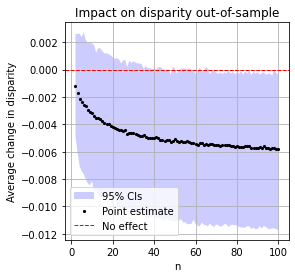

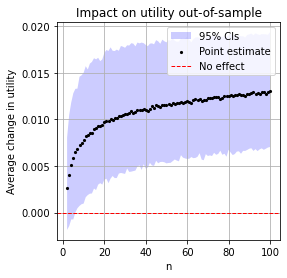

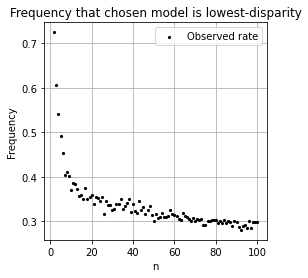

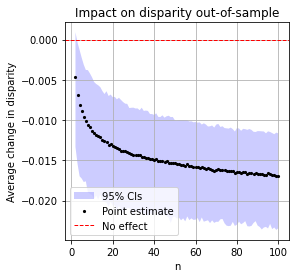

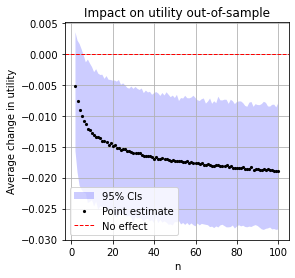

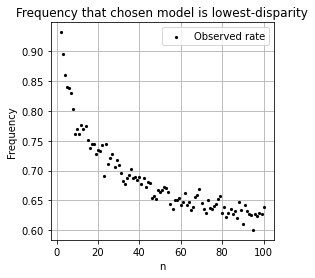

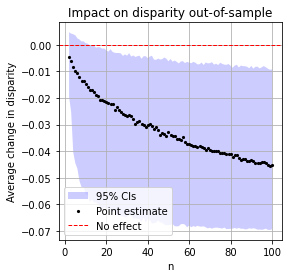

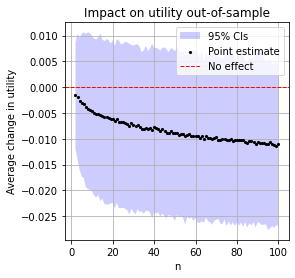

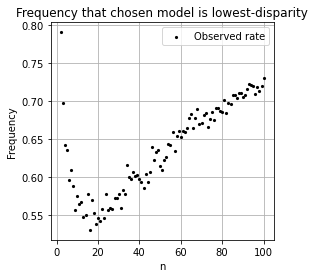

In [16]:
#suffixes = ['RFsamplegermancreditlessfeatures','RFrandomseedgermancreditlessfeatures','LRsamplegermancreditlessfeatures','DTsamplegermancreditlessfeatures']
suffixes = ['RFrandomseedadult','LRsampleadult','DTsampleadult']

#suffix='RFsampleadult'
for suffix in suffixes:
    analysis_df = pd.read_csv('result_data/analysis_df_info'+suffix+'.csv')

    a =  list(analysis_df['n_trials_for_selection'])
    b =  list(analysis_df['n_trials_for_selection'])
    b.reverse()
    CI_poly_xs = a+b

    a =  list(analysis_df['LB_disparity_change'])
    b =  list(analysis_df['UB_disparity_change'])
    b.reverse()
    CI_poly_ys = a+b

    fig,ax = plt.subplots(figsize=[4,4])

    plt.grid()
    ax.fill(CI_poly_xs,CI_poly_ys,alpha=0.2,linewidth=0,label='95% CIs',color='blue')
    #sns.scatterplot([0],[0],color='black')
    sns.scatterplot(data=analysis_df,x='n_trials_for_selection',y='avg_disparity_change',color='black',linewidth=0,s=10,marker='o',label='Point estimate',zorder=10)
    #sns.lineplot(data=analysis_df,x='n_trials_for_selection',y='avg_disparity_change',color='black',linewidth=2,label='Point estimate')
    #sns.lineplot(data=analysis_df,x='n_trials_for_selection',y='LB_disparity_change',color='blue',linewidth=2,label='Point estimate')
    plt.axhline(label='No effect',color='red',ls='--',linewidth=1,)

    plt.xlabel("n")
    plt.ylabel("Average change in disparity")
    plt.title("Impact on disparity out-of-sample")

    plt.legend()

    plt.savefig('figures/oos_disparity'+suffix+'clean.png',bbox_inches='tight',dpi=300)

    a =  list(analysis_df['n_trials_for_selection'])
    b =  list(analysis_df['n_trials_for_selection'])
    b.reverse()
    CI_poly_xs = a+b

    a =  list(analysis_df['LB_utility_change'])
    b =  list(analysis_df['UB_utility_change'])
    b.reverse()
    CI_poly_ys = a+b

    fig,ax = plt.subplots(figsize=[4,4])

    plt.grid()
    ax.fill(CI_poly_xs,CI_poly_ys,alpha=0.2,linewidth=0,label='95% CIs',color='blue')
    #sns.scatterplot([0],[0],color='black')
    sns.scatterplot(data=analysis_df,x='n_trials_for_selection',y='avg_utility_change',color='black',linewidth=0,s=10,marker='o',label='Point estimate',zorder=10)
    #sns.lineplot(data=analysis_df,x='n_trials_for_selection',y='avg_utility_change',color='black',linewidth=2,label='Point estimate')
    #sns.lineplot(data=analysis_df,x='n_trials_for_selection',y='LB_utility_change',color='blue',linewidth=2,label='Point estimate')
    plt.axhline(label='No effect',color='red',ls='--',linewidth=1,)

    plt.xlabel("n")
    plt.ylabel("Average change in utility")
    plt.title("Impact on utility out-of-sample")
    plt.legend()

    plt.savefig('figures/oos_utility'+suffix+'clean.png',bbox_inches='tight',dpi=300)

    a =  [1] + list(analysis_df['n_trials_for_selection'])
    b =  [1] + list(analysis_df['n_trials_for_selection'])
    b.reverse()
    CI_poly_xs = a+b

    a =  [1] + list(analysis_df['LB_disparity_perfectguessrate'])
    b =  [1] + list(analysis_df['UB_disparity_perfectguessrate'])
    b.reverse()
    CI_poly_ys = a+b

    fig,ax = plt.subplots(figsize=[4,4])

    plt.grid()
    #ax.fill(CI_poly_xs,CI_poly_ys,alpha=0.15,label='95% CIs',color='blue')
    #sns.scatterplot([0],[1],color='black')
    sns.scatterplot(data=analysis_df,x='n_trials_for_selection',y='avg_disparity_perfectguessrate',color='black',linewidth=0,s=10,marker='o',label='Observed rate',zorder=10)
    #sns.lineplot(data=analysis_df,x='n_trials_for_selection',y='avg_disparity_perfectguessrate',color='black',linewidth=2,label='Point estimate')
    #sns.lineplot(data=analysis_df,x='n_trials_for_selection',y='LB_disparity_change',color='blue',linewidth=2,label='Point estimate')
    #plt.axhline(1,label='No effect',color='red',linewidth=2,)

    #plt.ylim([0,1])

    plt.xlabel("n")
    plt.ylabel("Frequency")

    plt.title('Frequency that chosen model is lowest-disparity')
    plt.legend()

    plt.savefig('figures/oos_disparity_perfectguess_'+suffix+'_clean.png',bbox_inches='tight',dpi=300)
